In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn


import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')

In [2]:
# Importing Boston Housing Dataset from sklearn datasets and storing inside a variable called boston

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# determines that the dataset has 506 rows and 13 coloumns
boston.data.shape

(506, 13)

In [4]:

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:

# Determines the column names 
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Setting up our dataset for Linear Regression¶

In [6]:
#converting boston data into pandas dataframe using pd.Dataframe()

boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Replacing integers with feature names as columns.
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Adding "Price" as another feature in the current dataset which is a part of another attribute called "target" 
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_df.shape

(506, 14)

## Descriptive Stats

In [10]:
# Showing summary of each columns using describe()
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Analysis
## Building a regression model

## Step 1: Check for linearity with Scatter Plot
We'll see the relationship between prices and other variables because in order to create a good linear model the features should have a linear relationship with prices.

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


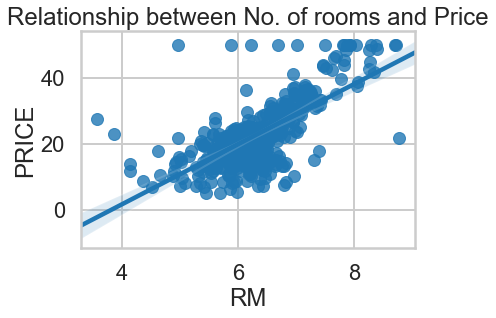

In [11]:
# Between prices and No. of rooms
sns.regplot(x="RM",y="PRICE", data=boston_df, fit_reg=True)
plt.title("Relationship between No. of rooms and Price")
plt.show()

#  We can see a strong positive correlation between no. of rooms and price. No. of rooms increases/decreases with increase/decrease in price.¶

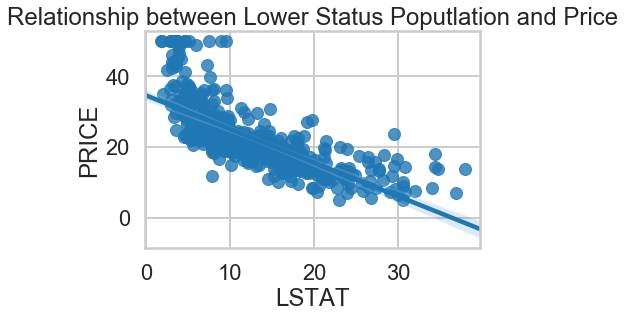

In [16]:
# Between prices and Lower Status Population
sns.regplot(y="PRICE", x = "LSTAT", data= boston_df, fit_reg = True)
plt.title ("Relationship between Lower Status Poputlation and Price")
plt.show()

## #  We can see a strong positive correlation between Lower Status Poputlation and Price No. of rooms increases/decreases with increase/decrease in price.¶

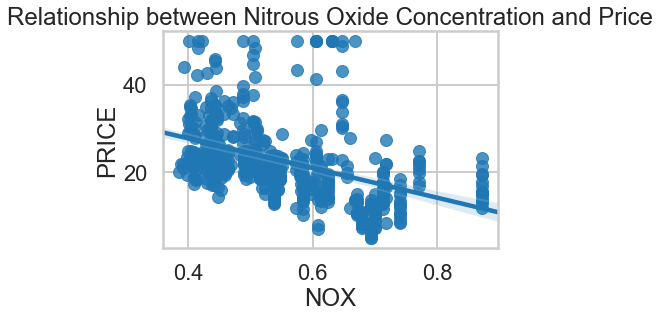

In [20]:
sns.regplot(y="PRICE", x= "NOX", data = boston_df, fit_reg = True)
plt.title ("Relationship between Nitrous Oxide Concentration and Price")
plt.show()

## We can see a strong negative correlation between NOX concentraation in air and price. The more/less concentration of NOX is in air the less/more the housing prices.

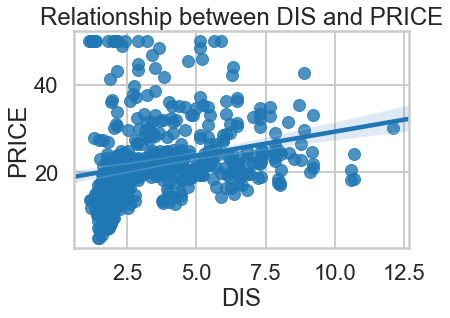

In [22]:
sns.regplot(y="PRICE", x= "DIS", data = boston_df, fit_reg = True)
plt.title ("Relationship between DIS and PRICE")
plt.show()

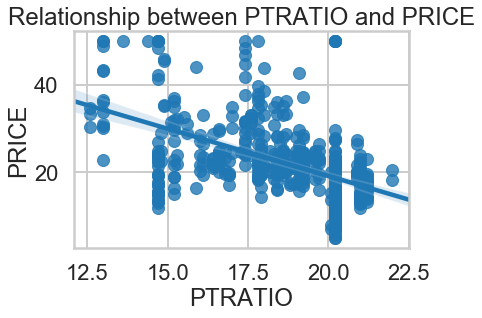

In [24]:

# Between prices and Pupil-Teacher ratio by town
sns.regplot(y="PRICE",x="PTRATIO", data=boston_df, fit_reg= True)
plt.title("Relationship between PTRATIO and PRICE")
plt.show()

# As the no. of students increases per teacher the housing prices decreases.

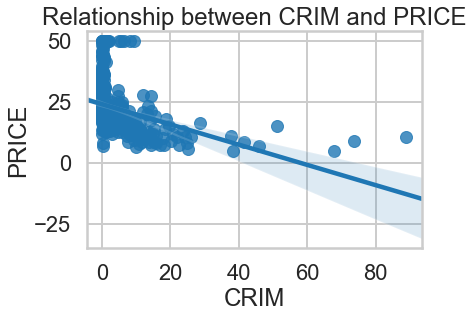

In [27]:
# Between prices and per capita crime rate by town
sns.regplot(y="PRICE",x="CRIM", data=boston_df, fit_reg= True)
plt.title("Relationship between CRIM and PRICE")
plt.show()

##
Weaker still descent predictor .As the no. of crimes increases the housing prices decreases.

## Step: 2 Checking for Normality with histograms
We must check for normality among variables . If they skewed in any way we need to transform them by taking log in order to normise them.

We saw that the scatter plot between Price and Crime Rate an observed an exponential decay of crimes. This can be overcome by normalising.

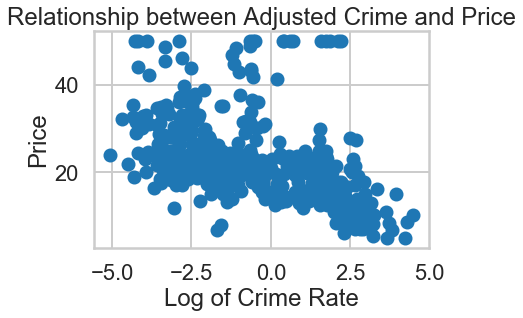

In [28]:
adj_CRIM = np.log(boston_df.CRIM)
plt.scatter(adj_CRIM , boston_df.PRICE)
plt.xlabel("Log of Crime Rate")
plt.ylabel("Price")
plt.title("Relationship between Adjusted Crime and Price")
plt.show()

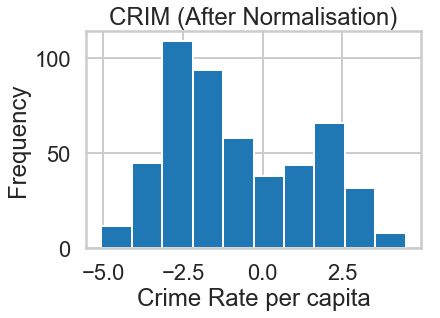

In [29]:
plt.hist(adj_CRIM)
plt.xlabel("Crime Rate per capita")
plt.ylabel("Frequency")
plt.title("CRIM (After Normalisation)")
plt.show()

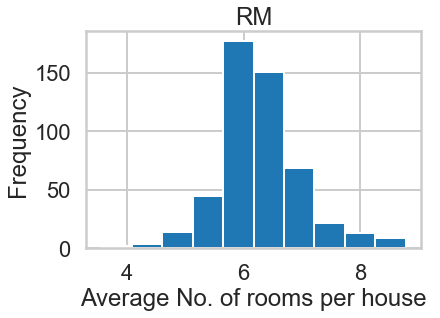

In [30]:
plt.hist(boston_df.RM)
plt.xlabel("Average No. of rooms per house")
plt.ylabel("Frequency")
plt.title("RM")
plt.show()

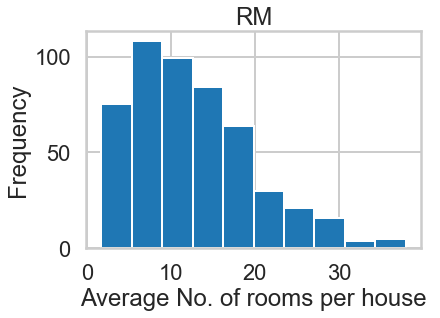

In [31]:
plt.hist(boston_df.LSTAT)
plt.xlabel("Average No. of rooms per house")
plt.ylabel("Frequency")
plt.title("RM")
plt.show()

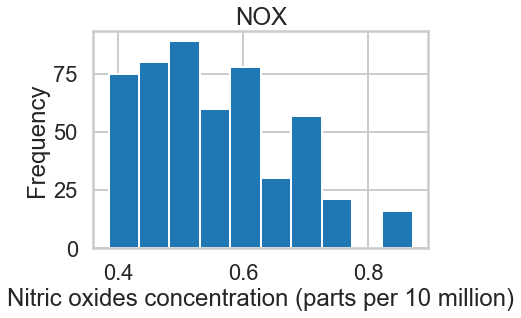

In [32]:
plt.hist(boston_df.NOX)
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Frequency")
plt.title("NOX")
plt.show()

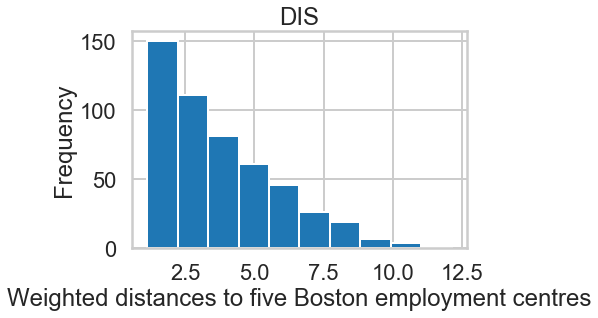

In [33]:
plt.hist(boston_df.DIS)
#plt.hist(np.log(boston_df.DIS))
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequency")
plt.title("DIS")
plt.show()

In [34]:
bos_df = boston_df
bos_df['CRIM'] = np.log(bos_df['CRIM'])
df = bos_df.iloc[:,[0,4,5,7,10,12]]
df.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
CRIM,1.000000,0.788616,-0.306943,-0.681903,0.389554,0.626615
NOX,0.788616,1.000000,-0.302188,-0.769230,0.188933,0.590879
RM,-0.306943,-0.302188,1.000000,0.205246,-0.355501,-0.613808
DIS,-0.681903,-0.769230,0.205246,1.000000,-0.232471,-0.496996
PTRATIO,0.389554,0.188933,-0.355501,-0.232471,1.000000,0.374044
LSTAT,0.626615,0.590879,-0.613808,-0.496996,0.374044,1.000000


## Linear regression with Boston housing data example
Here,

$Y$ = boston housing prices (also called "target" data in python)

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.

Its takes the following form Y=β0+β1X where β1 is the coefficient of X and β0 is the intercept.Both are known as model coefficients

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

## Fitting Linear Regrssion using Statsmodels


In [37]:
#importing regression modules
#ols- stands for Ordinary least squares: a method for estimating unknown parameters in a linear regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ', bos_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          3.67e-131
Time:                        22:48:44   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

## Interpreting Coeficients
There is lot of information in the above result. We only concentrate on the coefficient table (middle)

1 We start interpreting the p (p > |t|) value which is very small( basically zero). That means our features are statistically significant predictor of our PRICE .

2 Again In general each coef can be interpreted as an increase/decrease with a unit increase in the corresponding feature.For instance if we compare two groups of towns, one where the average number of rooms is say 5 and the other group is the same except that they all have 6 rooms. For these two groups the average difference in house prices is about 9.1 (in thousands) so about$9,100 difference which is nothing but coef of RM. The confidence interval finds us a range of plausible values for this difference, about (\$8,279, \$9,925).

3.Another signicant feature indicated by NOX which says on average each unit increase in NOX concentration in area will ultimately decrease the housing price by \$18,000 net of the other variables. The confidence interval finds us a range of plausible values for this difference,about (\$11,000, \$24,000).

4 Another signicant feature indicated by DIS which says on average each unit increase in DIS(weighted distances to five Boston employment centres) will ultimately decrease the housing price by \$1,000 net of the other variables. The confidence interval finds us a range of plausible values for this difference,about (\$854, \$1,500).

## Interpreting Confidence Intervals for the model coefficients

Statsmodels calculate 95% confidence intervals for our model coefficients,which can be interpreted as :-
If population from which this sample has been taken is sampled 100 times then approximately 95% of those confidence interval whould contain true coefficients.
Although 95% is just a convention
You can create 90% confidence intervals(which will be more narrow).
You can create 99% confidence intervals(which will be more wide).
The range above given is the probable range within which the coefficient lies.
Intrepreting R-Squared
Also known as the coefficient of determination or just R-squared. A statistical measure that tells how well a regression line approximates the real data points.A method of evaluating the overall fit of a linear model.

In the given model the R-squared value is 0.708 which basically means that approximately 70% of the total variance in the price can be determined by the current regression model.

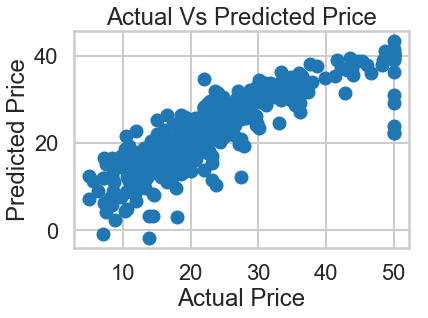

In [39]:
predicted_prices = m.fittedvalues
plt.scatter(  bos_df.PRICE , predicted_prices)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Price")
plt.show()

## Linear Regression using Sklearn (All features included).

In [41]:
#Spliting test and train set

from sklearn.model_selection import train_test_split
X = bos_df.drop('PRICE', axis = 1)
Y = bos_df['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33,random_state = 5 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


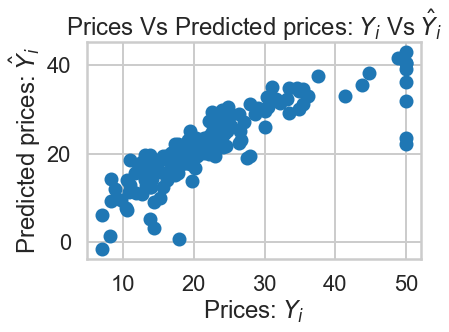

In [42]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

Y_pred = LinReg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [43]:
# displaying the coefficients of parameters  
print("Coefficients: \n", LinReg.coef_)

# displaying the R-squared score
print(LinReg.score(X_test , Y_test))

Coefficients: 
 [ 2.91429472e-01  3.63624438e-02 -2.47555447e-02  1.10925522e+00
 -1.29834557e+01  3.89110219e+00 -1.18923107e-02 -1.24562550e+00
  2.23495573e-01 -1.36600521e-02 -9.70026335e-01  1.17800958e-02
 -5.34376398e-01]
0.7086789571201162


In [44]:
# generating the mean squared error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse

27.30955831149809

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


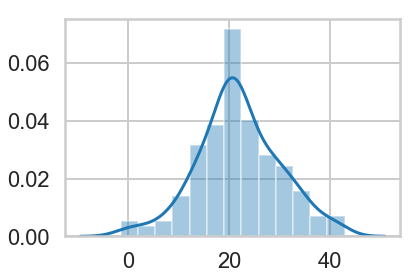

In [45]:
sns.distplot(Y_pred)


In [46]:
# mean absolute error which is the average of all predicted error values ,where all predicted error values are forced to be positive 
print(sklearn.metrics.mean_absolute_error(Y_test, Y_pred))

#root mean squared error is the root of the average of the squared predicted error values.
print(np.sqrt(mse))

3.3781785953800085
5.225854792423732


## Linear Regression (5 features only)¶

In [47]:
from sklearn.model_selection import train_test_split
X1 = bos_df[['NOX','RM','DIS','PTRATIO','LSTAT' ]]
Y1 = bos_df['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size =0.33,random_state = 5 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 5)
(167, 5)
(339,)
(167,)


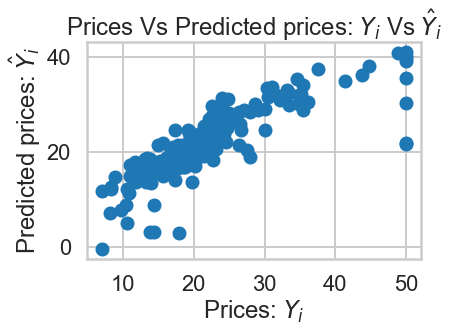

In [48]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

Y_pred = LinReg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [49]:
print(LinReg.score(X_test , Y_test))
cv_results = sklearn.model_selection.cross_val_score(LinReg, X_train, Y_train, cv = 5, scoring = 'r2')
msg = "%s: %f (%f)" % ('r2 score', cv_results.mean(),cv_results.std())
print(msg)

0.6840953220739522
r2 score: 0.694977 (0.029360)


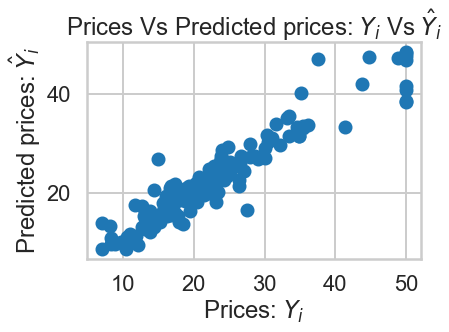

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train , Y_train)
Y_pred = rf.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()
#print(rf.score(X_test , Y_test))

In [53]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(Y_test , Y_pred)
spearman = spearmanr(Y_test, Y_pred)
pearson = pearsonr(Y_test, Y_pred)
print("Out of Bag R2 Score" , rf.oob_score_)
print("Test Data R2 Score:" , test_score)
print("Test Data Spearman Correlation:" ,  round(spearman[0], 3))
print("Test Data Pearson Correlation" , round(pearson[0],3))

Out of Bag R2 Score 0.8211453241420169
Test Data R2 Score: 0.8935026873334214
Test Data Spearman Correlation: 0.919
Test Data Pearson Correlation 0.946
